# Ch09. 주식데이터를 통해 groupby 사용하기

## 1. 데이터 이동하기 (shift)

> pandas shift

<img src=https://i.ibb.co/vcxZn1B/09-01.png, width=600>

데이터를 정해진 칸만큼 이동시키는 함수


**periods** (정수)

이동할 칸을 지정하는 인자

**freq**

날짜나 시간 데이터를 shift 할 때 사용하는 인자
 
**axis** (0 or 1)

이동 방향을 지정하는 인자

<br><br>

shift 설명 블로그 : https://kimpanda.tistory.com/102

shift 공식 문서 : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html

In [ ]:
# 실습 준비 코드
import pandas as pd
data = [['01/01', 1000], ['01/02', 1200], ['01/03', 900], 
        ['01/04', 1200], ['01/05', 1500]]
df = pd.DataFrame(data, columns=['날짜', '가격'])
df

,날짜,가격
0,01/01,1000
1,01/02,1200
2,01/03,900
3,01/04,1200
4,01/05,1500


In [ ]:
# 데이터 프레임에 shift 함수 적용하기
df.shift()

,날짜,가격
0,NaN,NaN
1,01/01,1000.0
2,01/02,1200.0
3,01/03,900.0
4,01/04,1200.0


In [ ]:
# shift 함수에 음수 입력하기
df.shift(-1)

,날짜,가격
0,01/02,1200.0
1,01/03,900.0
2,01/04,1200.0
3,01/05,1500.0
4,NaN,NaN


In [ ]:
# 가로방향으로 shift하기
df.shift(axis=1)

,날짜,가격
0,NaN,01/01
1,NaN,01/02
2,NaN,01/03
3,NaN,01/04
4,NaN,01/05


In [ ]:
# 시리즈를 shift해서 가격변동 열 만들기
df1 = df.copy()
df1['가격변동'] = df1['가격'] - df1['가격'].shift()
df1

,날짜,가격,가격변동
0,01/01,1000,NaN
1,01/02,1200,200.0
2,01/03,900,-300.0
3,01/04,1200,300.0
4,01/05,1500,300.0


In [ ]:
# diff 함수로 가격변동 열 만들기
df1['가격변동'] = df1['가격'].diff()
df1

,날짜,가격,가격변동
0,01/01,1000,NaN
1,01/02,1200,200.0
2,01/03,900,-300.0
3,01/04,1200,300.0
4,01/05,1500,300.0


In [ ]:
# 시리즈를 shift해서 변동률 열 만들기
df1 = df.copy()
df1['변동률'] = (df1['가격'] - df1['가격'].shift()) / df1['가격'].shift()
df1

,날짜,가격,변동률
0,01/01,1000,NaN
1,01/02,1200,0.200000
2,01/03,900,-0.250000
3,01/04,1200,0.333333
4,01/05,1500,0.250000


In [ ]:
# pct_change 함수로 열 만들기
df1['변동률'] = df1['가격'].pct_change()
df1

,날짜,가격,변동률
0,01/01,1000,NaN
1,01/02,1200,0.200000
2,01/03,900,-0.250000
3,01/04,1200,0.333333
4,01/05,1500,0.250000


## 2. groupby가 필요한 이유

<img src=https://i.ibb.co/LzZV0fq/09-02.png, width=600>

raw data에서 다른 열의 특성으로 그룹화해서 함수를 적용할 때 필요하다

→ raw data를 다룰 때는 매우 빈번한 일이다


위 그림에서 groupby로 성별 열로 그룹화해서 rank 함수를 적용하면 성별내 등수를 구할 수 있다 




## 3. groupby 함수 배우기

> pandas groupby


<img src=https://i.ibb.co/5rk4LCy/09-03.png, width=600>

그룹 내에서 함수를 적용하게 해주는 함수


**by** 

그룹을 나누는 기준. 복수라면 리스트로 입력

 

**axis** (0 or 1)

그룹해서 함수를 행에 적용할 것인지 열에 적용할 것인지 지정하는 인자. 기본값은 열

 

**level**

인덱스로 그룹을 나눌 때 사용하는 인자

 

**as_index** (bool / 기본값은 True)

groupby로 집계 함수를 사용할 때 그룹이 인덱스가 될지 지정하는 인자

 

**sort** (bool / 기본값은 True)

그룹의 key로 정렬을 할 것인지 지정하는 인자


<br><br> 

groupby 함수 설명 : https://kimpanda.tistory.com/103

groupby 판다스 공식 문서 : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [ ]:
# 수업 준비 코드
import pandas as pd
data1 = [['김판다', 'A', '남', 95], ['송중기', 'B', '남', 93],
         ['김나현', 'B', '여', 88], ['박효신', 'A', '남', 85],
         ['강승주', 'B', '여', 78], ['권보아', 'A', '여', 72]]

data2 = [['2021-01-01', '김판다', 10000], ['2021-01-01', '강승주', 2000],
         ['2021-01-02', '김판다', 20000], ['2021-01-02', '강승주', 5000],
         ['2021-01-03', '강승주', 8000], ['2021-01-03', '김판다', 5000]]

df1 = pd.DataFrame(data1, columns=['이름', '반', '성별', '점수'])
df2 = pd.DataFrame(data2, columns=['날짜', '이름', '입금'])
df1

,이름,반,성별,점수
0,김판다,A,남,95
1,송중기,B,남,93
2,김나현,B,여,88
3,박효신,A,남,85
4,강승주,B,여,78
5,권보아,A,여,72


In [ ]:
# 반으로 그룹화 해서 rank 함수 적용하기
df = df1.copy()
df['학급내등수'] = df.groupby('반')['점수'].rank(ascending=False)
df

,이름,반,성별,점수,학급내등수
0,김판다,A,남,95,1.0
1,송중기,B,남,93,1.0
2,김나현,B,여,88,2.0
3,박효신,A,남,85,2.0
4,강승주,B,여,78,3.0
5,권보아,A,여,72,3.0


In [ ]:
# 반과 성별로 그룹화 해서 rank 함수 적용하기
df = df1.copy()
df['등수2'] = df.groupby(['반', '성별'])['점수'].rank(ascending=False)
df

,이름,반,성별,점수,등수2
0,김판다,A,남,95,1.0
1,송중기,B,남,93,1.0
2,김나현,B,여,88,1.0
3,박효신,A,남,85,2.0
4,강승주,B,여,78,2.0
5,권보아,A,여,72,1.0


In [ ]:
# 적용할 함수로 집계함수 적용하기
df.groupby(['반', '성별'])['점수'].mean()

반  성별
A  남     90.0
   여     72.0
B  남     93.0
   여     83.0
Name: 점수, dtype: float64

In [ ]:
# 피벗테이블과 같은 교차표 만들기
df.groupby(['반', '성별'])['점수'].mean().unstack()

성별,남,여
반,,
A,90.0,72.0
B,93.0,83.0


<img src=https://i.ibb.co/hRFtSTb/groupby.jpg, width=600>

In [ ]:
df2

,날짜,이름,입금
0,2021-01-01,김판다,10000
1,2021-01-01,강승주,2000
2,2021-01-02,김판다,20000
3,2021-01-02,강승주,5000
4,2021-01-03,강승주,8000
5,2021-01-03,김판다,5000


In [ ]:
# groupby로 shift 함수 적용하기
df2['전일입금'] = df2.groupby('이름')['입금'].shift()
df2

,날짜,이름,입금,전일입금
0,2021-01-01,김판다,10000,NaN
1,2021-01-01,강승주,2000,NaN
2,2021-01-02,김판다,20000,10000.0
3,2021-01-02,강승주,5000,2000.0
4,2021-01-03,강승주,8000,5000.0
5,2021-01-03,김판다,5000,20000.0


## 4. 파이썬 라이브러리를 통해 주식데이터 가져오기 (Finance Data Reader)

**Finance Data Reader**

한국 주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리


<br><br>

**설치**



```python
!pip install -U finance-datareader
```

<br>

**사용**
```python
import FinanceDataReader as fdr
```

<br>

**국내주식 데이터 가져오기**

`fdr.DataReader` 함수로 국내 주식 데이터를 가져올 수 있다

삼성전자 주가 데이터를 2018-01-01부터 2020-12-31까지 가져온다

```python
fdr.DataReader('005930', '2018-01-01', '2020-12-31')
```

2018년부터 2020년까지의 모든 데이터이므로 아래와 같은 코드도 가능하다


```python
fdr.DataReader('005930', '2018', '2021')
```

<br>

**차트 설정**

```python
#  차트 설정
%matplotlib inline
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True
```


<br>

**기간내 종가 변동 차트 그리기**

데이터 프레임이니까 `pandas`의 `plot` 함수로 그려보자

```python
fdr.DataReader('005930', '2018', '2021')['Close'].plot()
```

<img src=https://i.ibb.co/R6VdqvD/09-04-01.png, width=800>


<br>

**캔들 차트 그리기**

`fdr.chart.plot` 함수로 캔들 차트를 그릴 수 있다

삼성전자의 2020년 1월 주가를 캔들차트로 그려보자

```python
df1 = fdr.DataReader('005930', '2020-01', '2020-02')
fdr.chart.plot(df1, width=600, height=400)
```

<img src=https://i.ibb.co/B3mbXZX/09-04-02.png, width=500>


캔들 차트의 인자는 링크를 참조 : 
https://nbviewer.org/gist/FinanceData/c6c336c4727386810bec9264e81f6bba


<br><br>

그외 많은 기능들이 있으니 다음링크를 참조

<img src=https://i.imgur.com/r0YE5Xs.png, width=400>

https://financedata.github.io/posts/finance-data-reader-users-guide.html


In [ ]:
# finance data reader 설치
!pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 삼성전자의 주가 데이터를 2018년부터 2020년까지 모두 가져오기
import FinanceDataReader as fdr
import pandas as pd
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행 출력의 바뀐 코드
fdr.DataReader('005930', '2018-01-01', '2020-12-31')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
...,...,...,...,...,...,...
2020-12-28,79000,80100,78200,78700,40085044,0.011568
2020-12-29,78800,78900,77300,78300,30339449,-0.005083
2020-12-30,77400,81300,77300,81000,29417421,0.034483


In [ ]:
# 연도로 가져올 수도 있다
fdr.DataReader('005930', '2018', '2021')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
...,...,...,...,...,...,...
2020-12-28,79000,80100,78200,78700,40085044,0.011568
2020-12-29,78800,78900,77300,78300,30339449,-0.005083
2020-12-30,77400,81300,77300,81000,29417421,0.034483


In [ ]:
# 차트 설정
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

<AxesSubplot:xlabel='Date'>

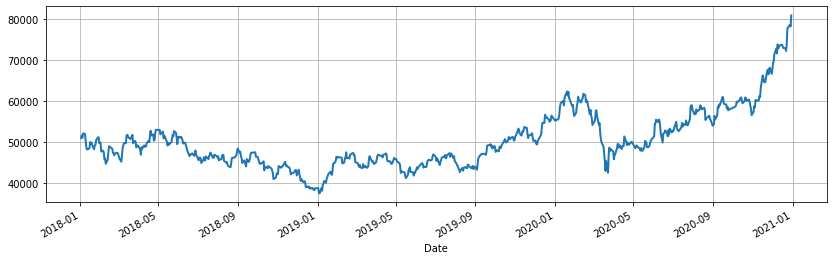

In [ ]:
# 종가 그래프 그리기
df = fdr.DataReader('005930', '2018-01-01', '2020-12-31')
df['Close'].plot()

In [ ]:
# 캔들차트 그리기
df1 = fdr.DataReader('005930', '2020-01', '2020-02')
fdr.chart.plot(df1, width=600, height=400)

In [ ]:
# 삼성전자와 카카오 두개 종목의 주가데이터 합쳐서 불러오기
stocks = ['005930', '035720']
df_ex1 = pd.DataFrame()
for i in stocks:
  df = fdr.DataReader(i, '2018', '2021')
  df['Code'] = i
  df_ex1 = pd.concat([df_ex1, df])
df_ex1

,Open,High,Low,Close,Volume,Change,Code
Date,,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177,005930
2018-01-03,52540,52560,51420,51620,200270,0.011760,005930
2018-01-04,52120,52180,50640,51080,233909,-0.010461,005930
...,...,...,...,...,...,...,...
2020-12-28,75168,75670,74164,74867,646464,-0.002678,035720
2020-12-29,76472,77375,75869,77175,857404,0.030828,035720
2020-12-30,77175,79082,76974,78179,813142,0.013009,035720


**주식 종목 코드와 종목명 얻기**

- `FinanceDataReader`를 통해서 주가 데이터를 가져오려면 종목 코드가 필요하다

- `FinanceDataReader`도 기본적인 종목명과 코드를 제공하지만 보다 세부적인 지표와 함께 종목코드와 종목명을 얻기 위해 KRX 사이트를 이용하자

  <img src=https://i.ibb.co/ZNLKc86/09-04.png, width=600>

  http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201


- 단순히 종목코드와 종목명 뿐만 아니라 시가총액, 등락률 등으로 원하는 종목을 필터링해서 파일로 가져올 수 있다

- 파일에서 데이터 프레임을 불러낼 수 있으니 종목의 데이터를 활용할 수 있다


- 단순 실습을 원하는 경우 23-02-27 기준의 전종목 데이터를 미리 다운받아둔 아래 파일을 활용하자

  https://raw.githubusercontent.com/panda-kim/csv_files/main/stock_230227.csv

- 실제 주가 데이터를 업무에 활용하는 경우는 직접 다운받아서 활용하자

In [ ]:
# KRX 사이트에서 현시점 기준 시가총액 상위 90개의 종목 리스트 가져오기
url1 = 'https://raw.githubusercontent.com/panda-kim/csv_files/main/stock_230227.csv'
df_stocks = pd.read_csv(url1).iloc[:, [0, 1, 2, 4, 5, 6, 7, 8, 9, 12]]
df_90 = df_stocks.sort_values('시가총액', ascending=False).iloc[:90, [0, 1]]
df_90

,종목코드,종목명
999,005930,삼성전자
155,373220,LG에너지솔루션
247,000660,SK하이닉스
...,...,...
645,241560,두산밥캣
2342,028670,팬오션
1006,029780,삼성카드


In [ ]:
# 현시점 기준 시가총액 상위 90개의 2018~2020년 주가 가져오기
stocks = df_90['종목코드'].tolist()
df_ex1 = pd.DataFrame()
for i in stocks:
  df = fdr.DataReader(i, '2018', '2021')
  df['Code'] = i
  df_ex1 = pd.concat([df_ex1, df])
df_ex1

<ipython-input-24-0de1d377a42c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Code'] = i


,Open,High,Low,Close,Volume,Change,Code
Date,,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177,005930
2018-01-03,52540,52560,51420,51620,200270,0.011760,005930
2018-01-04,52120,52180,50640,51080,233909,-0.010461,005930
...,...,...,...,...,...,...,...
2020-12-28,35700,35700,34700,35050,348624,-0.005674,029780
2020-12-29,33500,33600,32750,33100,325446,-0.055635,029780
2020-12-30,33050,33050,32000,32500,256237,-0.018127,029780


윗 셀을 실행하면 열만들기와 관련해서 경고가 뜨는데 피하고 싶다면 stocks로 아래 코드를 사용하면 된다

```python
stocks = df_90['종목코드'].tolist()
```

현 시점 기준으로는 시총 상위 90개에 해당하지만 2020년에 상장하지 않은 종목들이 있어 90개 종목의 데이터는 아니다

In [ ]:
# 날짜를 열로 만들고 종목명도 붙혀주기
df_ex2 = df_ex1.reset_index().merge(df_90.set_axis(['Code', 'Stock'], axis=1), how='left')
df_ex2

,Date,Open,High,Low,Close,Volume,Change,Code,Stock
0,2018-01-02,51380,51400,50780,51020,169485,0.001177,005930,삼성전자
1,2018-01-03,52540,52560,51420,51620,200270,0.011760,005930,삼성전자
2,2018-01-04,52120,52180,50640,51080,233909,-0.010461,005930,삼성전자
...,...,...,...,...,...,...,...,...,...
57259,2020-12-28,35700,35700,34700,35050,348624,-0.005674,029780,삼성카드
57260,2020-12-29,33500,33600,32750,33100,325446,-0.055635,029780,삼성카드
57261,2020-12-30,33050,33050,32000,32500,256237,-0.018127,029780,삼성카드


In [ ]:
# 파일로 저장하기
df_ex2.to_csv('stocks.csv', index=False)

## 5. 2일 연속 급상승 주식 필터링하기

**데이터와 경로명** : 

현 시점 시총 상위 90개 종목의 2018~2020년의 주가 데이터 

(2020년까지 상장하지 않았던 종목 제외하면 81개)

https://raw.githubusercontent.com/panda-kim/csv_files/main/stocks.csv

<br>

**위 종목들 중에 2일 연속 20%이상 상승한 데이터만 필터링 해보자**

In [ ]:
# 프로젝트 코드
import pandas as pd
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행 출력의 바뀐 코드
url = 'https://raw.githubusercontent.com/panda-kim/csv_files/main/stocks.csv'
df_ex2 = pd.read_csv(url, dtype={'Code':'str'})
df_ex2

,Date,Open,High,Low,Close,Volume,Change,Code,Stock
0,2018-01-02,51380,51400,50780,51020,169485,0.001177,005930,삼성전자
1,2018-01-03,52540,52560,51420,51620,200270,0.011760,005930,삼성전자
2,2018-01-04,52120,52180,50640,51080,233909,-0.010461,005930,삼성전자
...,...,...,...,...,...,...,...,...,...
57259,2020-12-28,35700,35700,34700,35050,348624,-0.005674,029780,삼성카드
57260,2020-12-29,33500,33600,32750,33100,325446,-0.055635,029780,삼성카드
57261,2020-12-30,33050,33050,32000,32500,256237,-0.018127,029780,삼성카드


In [ ]:
# 2거래일 연속 20%이상 상승한 데이터 필터링
cond1 = df_ex2['Change'] >= 0.2
cond2 = df_ex2.groupby('Stock')['Change'].shift() >= 0.2
df_ex2[cond1 & cond2]

,Date,Open,High,Low,Close,Volume,Change,Code,Stock
22484,2020-07-22,6986,8236,6986,7608,92389322,0.200189,034020,두산에너빌리티
22511,2020-08-31,11969,14672,11747,14275,82099317,0.238504,034020,두산에너빌리티
39353,2020-07-06,214500,214500,193500,214500,7126211,0.300000,326030,SK바이오팜
54666,2019-10-07,38810,45906,37224,45448,14077449,0.266278,028300,HLB


결과가 맞는지 두산에너빌리티로 확인해보자

<img src=https://i.ibb.co/5RX6WpG/09-05-01.png, width=600>

## 6. 시리즈와 데이터프레임의 연산 (broad casting)

**시리즈와 데이터 프레임의 연산은 브로드 캐스팅(broad casting)을 한다**

<img src=https://i.ibb.co/1GrVPzq/09-06-01.png, width=600>

<img src=https://i.ibb.co/d5BwbVt/09-06-02.png, width=600>

먼저 시리즈의 눕혀진 다음 그 후 행방향으로 확장해서 데이터 프레임을 만들어 연산을 하는 것과 같다 (axis=1이며 기본값)

In [ ]:
# 실습 준비 코드
import pandas as pd
data = [[83, 66, 72], [87, 94, 98], [62, 71, 69], [94, 92, 72]]
df = pd.DataFrame(data, index=list('ABCD'), columns=['국어', '영어', '수학'])
s1 = pd.Series([1, 2, 3], index=['국어', '영어', '수학'])
s2 = pd.Series([10, 0, 0, 10], index=list('ABCD'))

In [ ]:
# 시리즈와 데이터 프레임의 연산 : 브로드 캐스팅
df + s1

,국어,영어,수학
A,84,68,75
B,88,96,101
C,63,73,72
D,95,94,75


In [ ]:
# 아래 연산은 연산 함수를 사용해 브로드 캐스팅의 축을 바꿔야 한다
df + s2

,A,B,C,D,국어,수학,영어
A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**broad casting의 방향 바꾸기**

<img src=https://i.ibb.co/4WV6S0z/09-06-03.png, width=600>

<img src=https://i.ibb.co/ZLYWJYf/09-06-04.png, width=600>

열 방향으로 확장시킨 것과 같은 결과를 얻으려면 axis=0으로 브로드 캐스팅을 해야한다

이것은 연산자로는 할 수 없고 연산 함수를 써야 한다

**연산자와 연산함수**

- 덧셈(+) : `add`
- 뺄셈(-) : `sub`
- 곱셈(*) : `mul`
- 나눗셈(/) : `div` 

In [ ]:
# 브로드 캐스팅은 axis=1이 기본값이다
df.add(s2, axis=0)

,국어,영어,수학
A,93,76,82
B,87,94,98
C,62,71,69
D,104,102,82


In [ ]:
# 비교연산도 브로드 캐스팅 할 수 있다
df > df.mean()

,국어,영어,수학
A,True,False,False
B,True,True,True
C,False,False,False
D,True,True,False


## 7. 신규 상장 주식의 주가 변동 추이 알아보기

In [ ]:
# 프로젝트 코드
import pandas as pd
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행 출력의 바뀐 코드
url = 'https://raw.githubusercontent.com/panda-kim/csv_files/main/stocks.csv'
new = ['에코프로비엠', '우리금융지주', '하이브', 'SK바이오팜', '카카오게임즈']
df_ex2 = pd.read_csv(url, dtype={'Code':'str'})
df_ex2

,Date,Open,High,Low,Close,Volume,Change,Code,Stock
0,2018-01-02,51380,51400,50780,51020,169485,0.001177,005930,삼성전자
1,2018-01-03,52540,52560,51420,51620,200270,0.011760,005930,삼성전자
2,2018-01-04,52120,52180,50640,51080,233909,-0.010461,005930,삼성전자
...,...,...,...,...,...,...,...,...,...
57259,2020-12-28,35700,35700,34700,35050,348624,-0.005674,029780,삼성카드
57260,2020-12-29,33500,33600,32750,33100,325446,-0.055635,029780,삼성카드
57261,2020-12-30,33050,33050,32000,32500,256237,-0.018127,029780,삼성카드


In [ ]:
# 신규상장 종목 리스트
new

['에코프로비엠', '우리금융지주', '하이브', 'SK바이오팜', '카카오게임즈']

In [ ]:
# 신규 상장 종목만 필터링
cond1 = df_ex2['Stock'].isin(new)
df_ex3 = df_ex2[cond1].copy()
df_ex3

,Date,Open,High,Low,Close,Volume,Change,Code,Stock
13284,2019-03-05,15096,16208,14800,15616,15995367,NaN,247540,에코프로비엠
13285,2019-03-06,15911,17196,15738,16975,6007950,0.087026,247540,에코프로비엠
13286,2019-03-07,17369,17888,17097,17296,4126721,0.018910,247540,에코프로비엠
...,...,...,...,...,...,...,...,...,...
55045,2020-12-28,45250,45500,44900,45500,511144,0.005525,293490,카카오게임즈
55046,2020-12-29,45700,45750,45300,45450,358189,-0.001099,293490,카카오게임즈
55047,2020-12-30,45450,46400,45250,46000,468697,0.012101,293490,카카오게임즈


In [ ]:
# 상장일부터 지난 일수를 알려주는 Days열을 만들기
df_ex3['Days'] = df_ex3.groupby('Stock')['Date'].rank().astype('int')
df_ex3

,Date,Open,High,Low,Close,Volume,Change,Code,Stock,Days
13284,2019-03-05,15096,16208,14800,15616,15995367,NaN,247540,에코프로비엠,1
13285,2019-03-06,15911,17196,15738,16975,6007950,0.087026,247540,에코프로비엠,2
13286,2019-03-07,17369,17888,17097,17296,4126721,0.018910,247540,에코프로비엠,3
...,...,...,...,...,...,...,...,...,...,...
55045,2020-12-28,45250,45500,44900,45500,511144,0.005525,293490,카카오게임즈,73
55046,2020-12-29,45700,45750,45300,45450,358189,-0.001099,293490,카카오게임즈,74
55047,2020-12-30,45450,46400,45250,46000,468697,0.012101,293490,카카오게임즈,75


In [ ]:
# 30일 내의 데이터만 필터링해서 종목별 종가를 피벗테이블로 만들기
cond2 = df_ex3['Days'] <= 30
df_ex4 = df_ex3[cond2].pivot_table('Close', index='Days', columns='Stock')
df_ex4

Stock,SK바이오팜,에코프로비엠,우리금융지주,카카오게임즈,하이브
Days,,,,,
1,127000,15616,15300,62400,255420
2,165000,16975,16000,81100,198495
3,214500,17296,15650,73800,187110
...,...,...,...,...,...
28,192500,16554,13400,45500,178200
29,191500,16308,13350,44100,179190
30,191000,15789,13500,44050,172260


In [ ]:
# 주가를 상장 첫날 종가의 비율로 나타내기
df_ex4 / df_ex4.iloc[0]

Stock,SK바이오팜,에코프로비엠,우리금융지주,카카오게임즈,하이브
Days,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.299213,1.087026,1.045752,1.299679,0.777132
3,1.688976,1.107582,1.022876,1.182692,0.732558
...,...,...,...,...,...
28,1.515748,1.060067,0.875817,0.729167,0.697674
29,1.507874,1.044314,0.872549,0.706731,0.701550
30,1.503937,1.011078,0.882353,0.705929,0.674419


**판다스의 `plot` 함수에서 `pandas_bokeh` backend 사용하기**


1. `pandas_bokeh`를 설치한다

```python
   !pip install pandas_bokeh
```

2. `plot`의 backend를 `pandas bokeh`로 바꾼다 


```python
   pd.options.plotting.backend = 'pandas_bokeh'
```


3. `padas_bokeh` 기반의 그래프를 노트북 파일에 출력시키려면 `bokeh`도 설치해야 한다

```python
   !pip install bokeh
```



4. 다음 코드로 출력을 노트북으로 바꾸면 준비 끝

```python
   import bokeh.plotting as bp
   bp.output_notebook()
```

In [ ]:
# pandas_bokeh 설치
!pip install pandas_bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# plot의 backend를 pandas bokeh로 바꾼다
pd.options.plotting.backend = 'pandas_bokeh'

In [ ]:
# bokeh를 설치
!pip install bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# bokeh의 출력을 노트북으로 해주는 코드
import bokeh.plotting as bp
bp.output_notebook()

In [ ]:
# 신규 상장 주식의 30일간 추이 그래프로 그리기
df_ex4.div(df_ex4.iloc[0]).plot(xlim=(1, 30))

Figure(id='1355', ...)